In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r'C:\Users\ezzed\Desktop\siteweb\flaskapp\ml\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

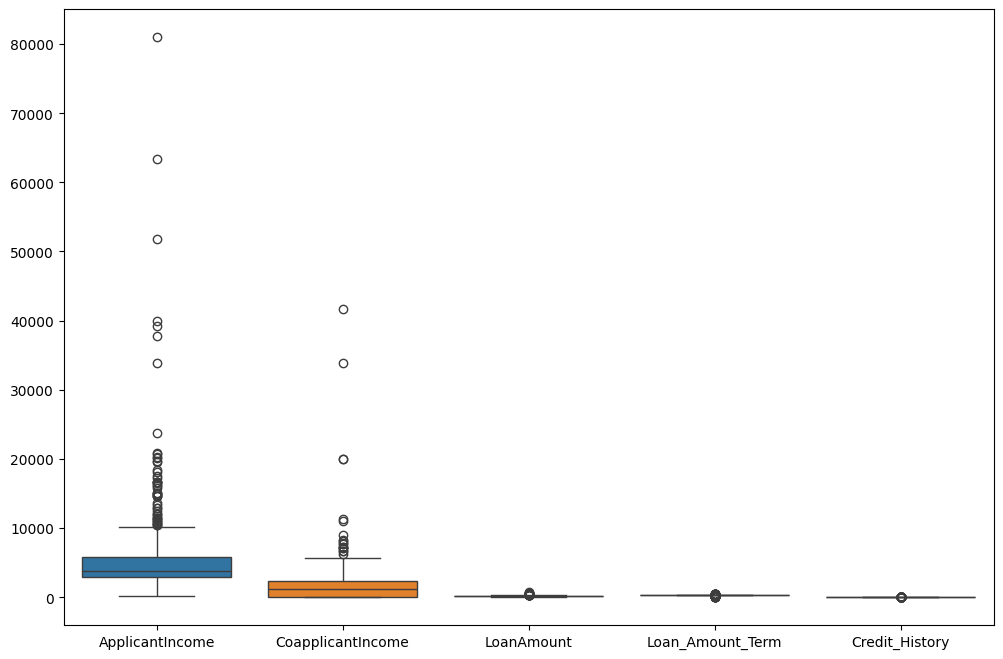

In [7]:
##cheking the outliers 
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [8]:
## fill the null values of numerical data type 
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
##fill the null values of object data type
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [10]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

number of people how took loan by Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

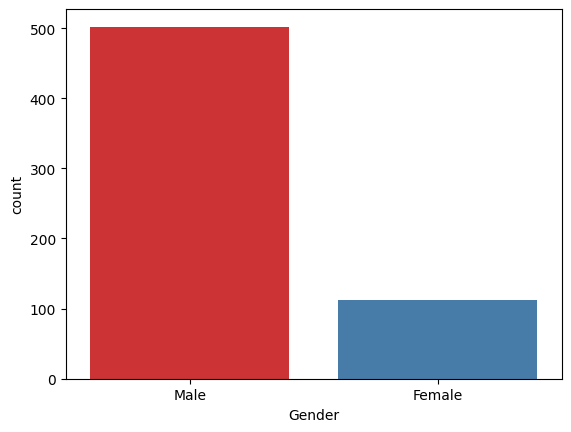

In [12]:
print('number of people how took loan by Gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

number of people how took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

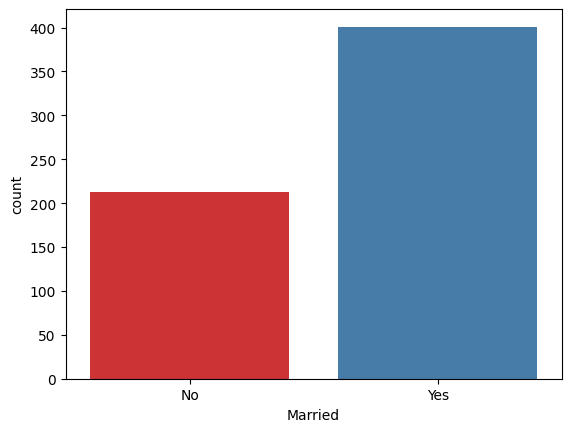

In [13]:
print('number of people how took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people how took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

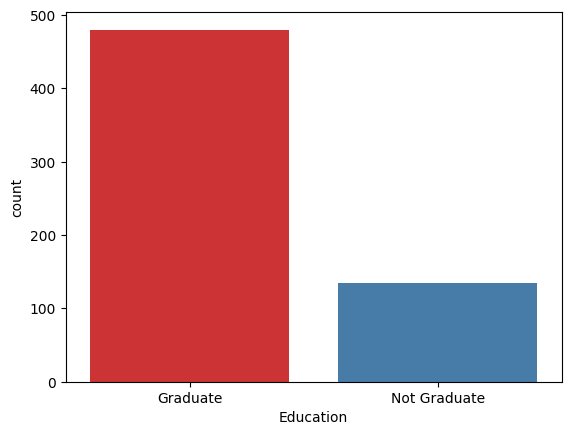

In [14]:
print('number of people how took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df,palette='Set1')

<Axes: >

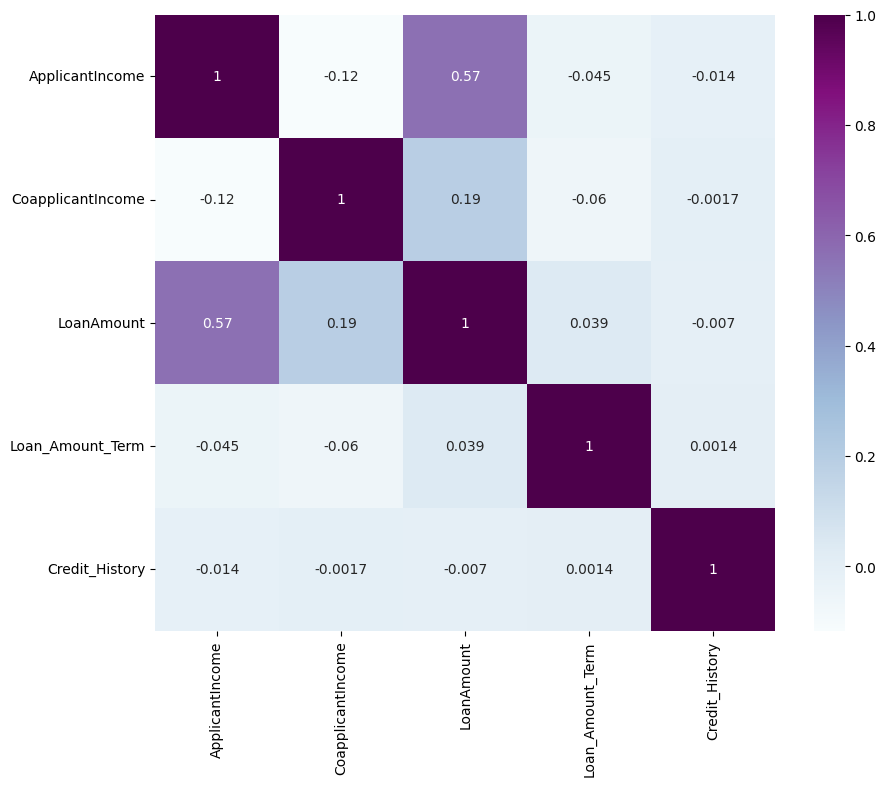

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot= True,cmap='BuPu')

In [16]:
##total applicant INCOME
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

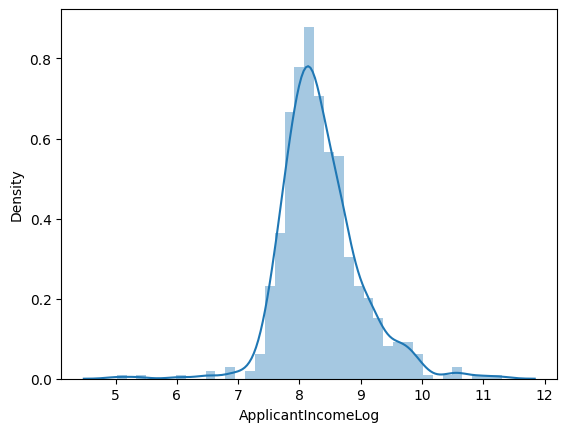

In [17]:
##apply Log Transformation
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncomeLog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

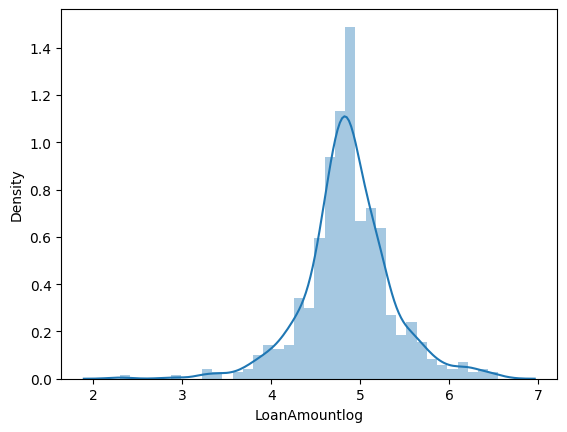

In [18]:
df['LoanAmountlog']=np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='LoanAmountTermlog', ylabel='Density'>

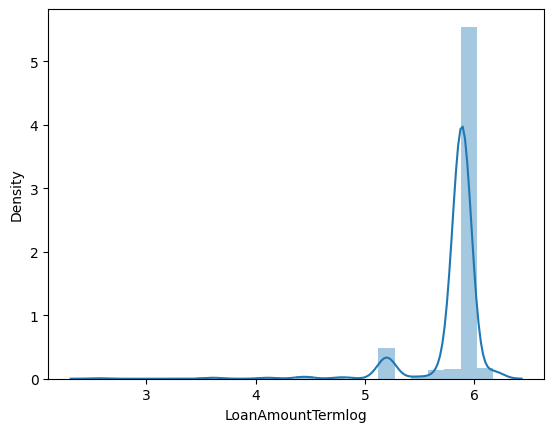

In [19]:
df['LoanAmountTermlog']=np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['LoanAmountTermlog'])

<Axes: xlabel='TotalIncomelog', ylabel='Density'>

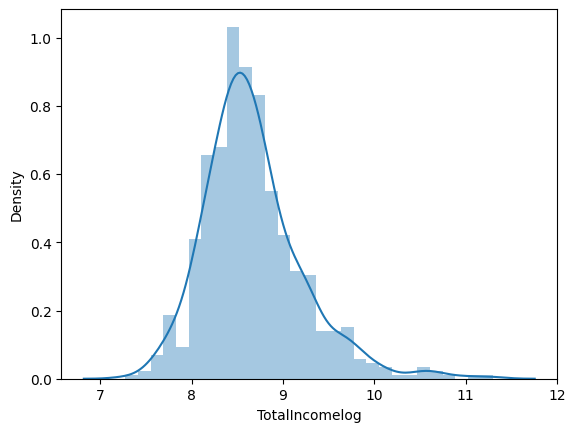

In [20]:
df['TotalIncomelog']=np.log(df['Total_Income']+1)
sns.distplot(df['TotalIncomelog'])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [22]:
##drop unecessary columns
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df=df.drop(columns=cols,axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [23]:
##encoding Technique : label encoding, one Hot Encoding 
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols :
    df[col]=le.fit_transform(df[col])
    

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [25]:
df.dtypes

Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
Credit_History        float64
Property_Area           int32
Loan_Status             int32
ApplicantIncomeLog    float64
LoanAmountlog         float64
LoanAmountTermlog     float64
TotalIncomelog        float64
dtype: object

In [26]:
##split dependant and independant features
X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [27]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
##logistic Regression
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1=model1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_model1)


In [31]:
accuracy

0.7727272727272727

In [32]:
score=cross_val_score(model1,X,y,cv=5)
np.mean(score)

0.809462881514061

In [33]:
##decision tree
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred_model2=model2.predict(X_test)
accuracy1=accuracy_score(y_pred_model2,y_test)
print('accuracy score of decision tree model:',accuracy1)

accuracy score of decision tree model: 0.7337662337662337


In [34]:
score=cross_val_score(model2,X,y,cv=5)
np.mean(score)

0.6873117419698787

In [35]:
##RandomForestClassifier 
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred_model3=model3.predict(X_test)
accuracy2=accuracy_score(y_pred_model3,y_test)
print('accuracy score of RandomForestClassifier model:',accuracy2)

accuracy score of RandomForestClassifier model: 0.8051948051948052


In [36]:
##KNeighborsClassifier 
model4=KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred_model4=model4.predict(X_test)
accuracy3=accuracy_score(y_pred_model4,y_test)
print('accuracy score of KNeighborsClassifier model:',accuracy3)

accuracy score of KNeighborsClassifier model: 0.7142857142857143


In [37]:
score=cross_val_score(model4,X,y,cv=5)
np.mean(score)

0.7361721977875517

In [38]:
from sklearn.metrics import classification_report
def genenrate_classification_report(model_name,y_test,y_pred):
    report=classification_report(y_test,y_pred)
    print(f"Classification Report for{model_name}:\n{report}\n")
genenrate_classification_report(model1,y_test,y_pred_model1)
genenrate_classification_report(model2,y_test,y_pred_model2)
genenrate_classification_report(model3,y_test,y_pred_model3)
genenrate_classification_report(model4,y_test,y_pred_model4)

Classification Report forLogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report forDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.64      0.56      0.59        54
           1       0.78      0.83      0.80       100

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154


Classification Report forRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.90      0.50      0.64        54
           1       0.78      0.97      0.87       100

    accuracy                   

In [39]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [40]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
oversample=RandomOverSampler(random_state=42)
X_resampled,y_resampled=oversample.fit_resample(X,y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Loan_status")], axis=1)

In [43]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [44]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [45]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [46]:
X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test=train_test_split(X_resampled,y_resampled,test_size=0.25,random_state=42)

In [47]:
##logistic Regression
model1=LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1=model1.predict(X_resampled_test)
accuracy=accuracy_score(y_resampled_test,y_pred_model1)
accuracy

0.6919431279620853

In [48]:
##DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2=model2.predict(X_resampled_test)
accuracy=accuracy_score(y_resampled_test,y_pred_model2)
accuracy

0.7914691943127962

In [49]:
##RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3=model3.predict(X_resampled_test)
accuracy=accuracy_score(y_resampled_test,y_pred_model3)
accuracy

0.8767772511848341

In [50]:
##KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4=model4.predict(X_resampled_test)
accuracy=accuracy_score(y_resampled_test,y_pred_model4)
accuracy

0.7298578199052133

In [51]:
from sklearn.metrics import classification_report
def genenrate_classification_report(model_name,y_test,y_pred):
    report=classification_report(y_test,y_pred)
    print(f"Classification Report for{model_name}:\n{report}\n")
genenrate_classification_report(model1,y_resampled_test,y_pred_model1)
genenrate_classification_report(model2,y_resampled_test,y_pred_model2)
genenrate_classification_report(model3,y_resampled_test,y_pred_model3)
genenrate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report forLogisticRegression():
              precision    recall  f1-score   support

           0       0.84      0.54      0.65       114
           1       0.62      0.88      0.72        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.73      0.69      0.69       211


Classification Report forDecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       114
           1       0.81      0.71      0.76        97

    accuracy                           0.79       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211


Classification Report forRandomForestClassifier():
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       114
           1       0.84      0.90      0.87        97

    accuracy                   

In [52]:
features_to_drop = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
X_resampled_train.drop(columns=features_to_drop, inplace=True)
X_resampled_test.drop(columns=features_to_drop, inplace=True)

In [53]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

66.82464454976304

In [54]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  83.41232227488152


In [55]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
feature_importances = model3.feature_importances_
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  86.25592417061611


In [ ]:
import pickle

# Train your model
model3=RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)

# Save the model to a file
with open('model3.pkl', 'wb') as file:
    pickle.dump(model3, file)

